In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Func:
    def __init__(self, L, R, T, amountX, amountT):
        self.L = L
        self.R = R
        self.T = T
        self.amountX = amountX
        self.amountT = amountT
        self.h = (R - L) / amountX
        self.t = T / amountT
        self.C = self.t / self.h
        self.X = list(np.linspace(L, R, amountX + 1))
        self.TT = list(np.linspace(0, T, amountT + 1))
        self.f = [[0] * (self.amountT+1) for i in range(self.amountX+1)]


    def Finitial(self):
      self.f = [[0] * (self.amountT+1) for i in range(self.amountX+1)]
      for i in range(self.amountX+1):
        if self.X[i] <= 0:
          self.f[i][0] = 1
      for i in range(self.amountT+1):
        self.f[0][i] = 1


    def final(self):
      Y = []
      XX = []
      for i in range(int(self.X.index(0)-3), int(self.X.index(0)+33)):
        Y.append(self.f[i][20])
        XX.append(self.X[i]-0.01)
      return Y, XX


    def __call__(self):
      raise NotImplementedError

In [ ]:
class Func1(Func):
    def __call__(self):
      self.Finitial()
      for j in range(self.amountT):
        for i in range(1,self.amountX):
          self.f[i][j+1] = self.f[i][j] - self.C*(self.f[i][j] - self.f[i-1][j])
      y, x = self.final()
      return y, x  

In [ ]:
class Func2(Func):
    def __call__(self):
      self.Finitial()
      for j in range(self.amountT):
        for i in range(1,self.amountX):
          self.f[i][j+1] = self.f[i][j] - 0.5*self.C*(self.f[i+1][j] - self.f[i-1][j]) + 0.5*self.C**2*(self.f[i+1][j]-2*self.f[i][j] + self.f[i-1][j])
      y, x = self.final()
      return y, x  


In [ ]:
class Func3(Func):
    def __call__(self):
      self.Finitial()
      for j in range(self.amountT):
        for i in range(1,self.amountX):
          self.f[i][j+1] = self.f[i][j] - self.C * (self.f[i][j] - self.f[i-1][j]) - 0.25*self.C* (1 - self.C) * (self.f[i+1][j]-self.f[i][j] - self.f[i-1][j] + self.f[i-2][j])
      y, x = self.final()
      return y, x    

In [ ]:
class Func4(Func):
    def __call__(self):
      self.Finitial()
      for j in range(self.amountT):
        for i in range(1,self.amountX):
          self.f[i][j+1] = self.f[i][j] - self.C * (self.f[i][j] - self.f[i-1][j]) - self.C* (2 - self.C) * (1 - self.C) * self.f[i+1][j] / 6 + self.C * (1 - self.C)**2 * self.f[i][j] / 2 + self.C**2 * (1 - self.C) * self.f[i-1][j] / 2 + self.C * (self.C**2 - 1) * self.f[i-2][j] / 6
      y, x = self.final()
      return y, x    

In [ ]:
class Func5(Func):
    def __call__(self):
      self.Finitial()
      for j in range(self.amountT):
        for i in range(1,self.amountX):
          if (self.f[i][j] - self.f[i-1][j])*(self.f[i][j] - self.f[i][j-1]) <= 0:
            self.f[i][j+1] = -0.5*self.C*(1 - self.C)*self.f[i+1][j] + (1-self.C**2) * self.f[i][j] + 0.5* self.C* (1+self.C)* self.f[i-1][j]
          else:
            self.f[i][j+1] = (1-0.5*self.C*(3-self.C))*self.f[i][j] + self.C*(2-self.C)*self.f[i-1][j] - 0.5*self.C*(1-self.C)*self.f[i-2][j]
      

      y, x = self.final()
      return y, x  

In [ ]:
F1 = Func1(-0.5,0.5,0.1,1500,200)

In [ ]:
Y1 = []
XX1 = []
Y1, XX1 = F1()

In [ ]:
F2 = Func2(-0.5,0.5,0.1,1500,200)

In [ ]:
Y2 = []
XX2 = []
Y2, XX2 = F2()

In [ ]:
F3 = Func3(-0.5,0.5,0.1,1500,200)
Y3 = []
XX3 = []
Y3, XX3 = F3()

In [ ]:
F4 = Func4(-0.5,0.5,0.1,1500,200)
Y4 = []
XX4 = []
Y4, XX4 = F4()

In [ ]:
F5 = Func5(-0.5,0.5,0.1,1500,200)
Y5 = []
XX5 = []
Y5, XX5 = F5()

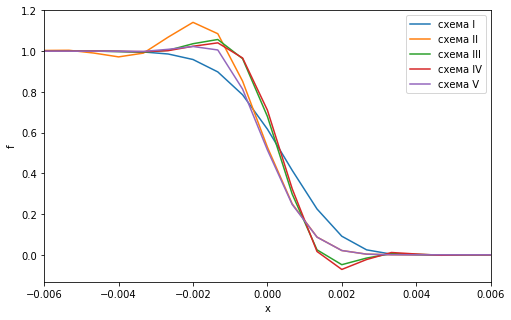

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(XX1, Y1)
plt.plot(XX2, Y2)
plt.plot(XX3, Y3)
plt.plot(XX4, Y4)
plt.plot(XX5, Y5)
plt.xlabel('x')
plt.ylabel('f')
plt.legend(['схема I', 'схема II', 'схема III', 'схема IV', 'схема V'])
plt.xlim (-0.006, 0.006)
plt.savefig('график.png')
plt.show()


h = 0.0007
 
C = 0.75